# 4.1. Import library and import data

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words()

In [2]:
# Import Data
df=pd.read_csv('data_cleaned.csv')
df.head()

comments predicted_sentiment
0  kan kata dia berkeping klo saya buaguuuuus bgt...            negative
1  Pak jokowi presiden terbaik di indonesia,kiner...            positive
2  ko bawa saja palu palu lima kilo Cari batu di ...            negative
3  Hukum SDH di injak2 oleh orang yg seharusnya m...            negative
4  Mudah² an dengan putuskan MK ini ....tidak rek...            positive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   comments             1107 non-null   object
 1   predicted_sentiment  1107 non-null   object
dtypes: object(2)
memory usage: 17.4+ KB


In [4]:
df.describe().T

count unique  \
comments             1107   1101   
predicted_sentiment  1107      2   

                                                                   top freq  
comments             Semoga SJ Jokowi ,mau sadar,tau diri ,Negara R...    5  
predicted_sentiment                                           negative  627

# 4.2. EDA and DATA PREPROCESSING:

## EDA:

In [5]:
#sentiment count: 
df['predicted_sentiment'].value_counts()

negative    627
positive    480
Name: predicted_sentiment, dtype: int64

In [6]:
df['comments'].str.len().hist()

<Axes: >

Text(0.5, 1.0, 'Negative comments')

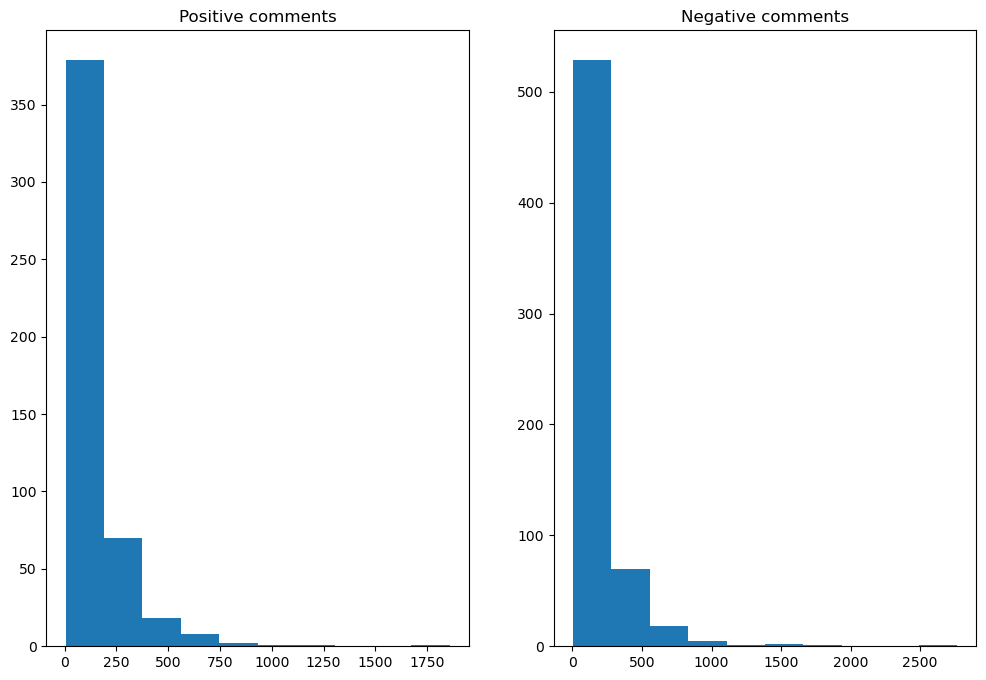

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['predicted_sentiment']=='positive']['comments'].str.len())
ax1.set_title( 'Positive comments')
ax2.hist(df[df['predicted_sentiment']=='negative']['comments'].str.len())
ax2.set_title( 'Negative comments')

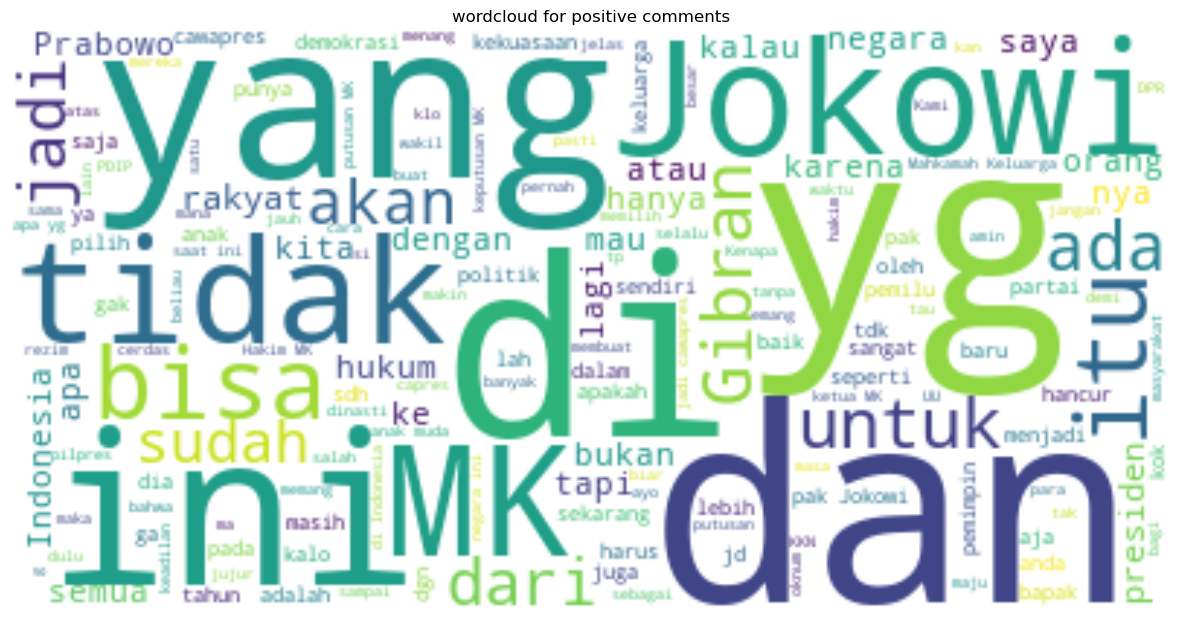

In [8]:
text = " ".join(i for i in df[df['predicted_sentiment']=='positive']['comments'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive comments')
plt.show()

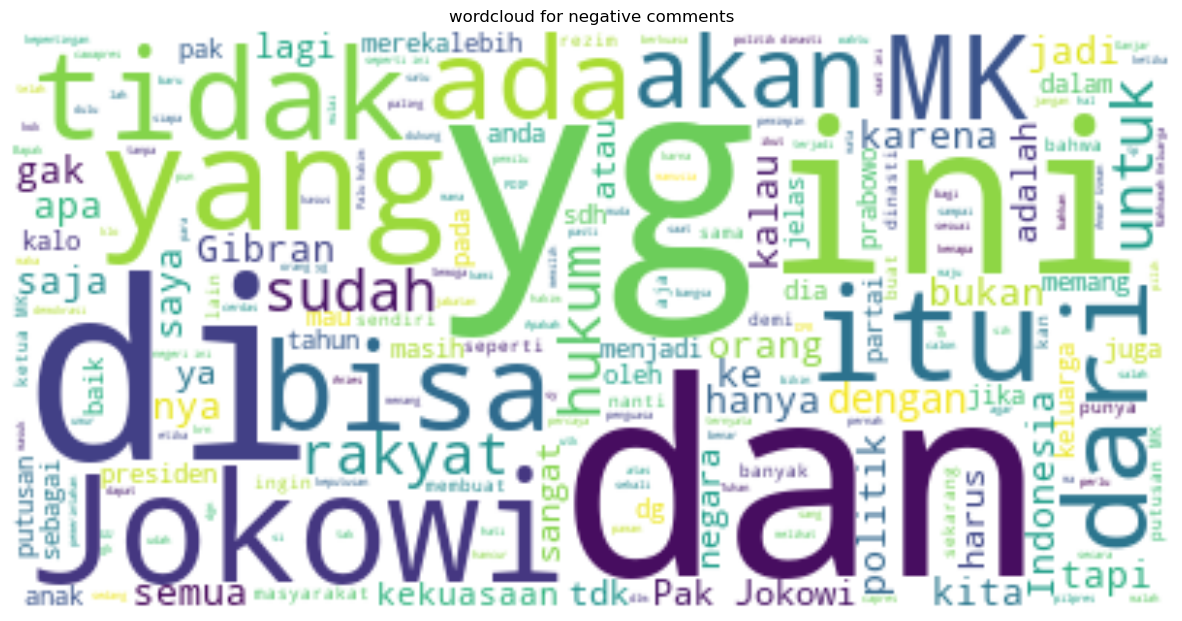

In [9]:
text = " ".join(i for i in df[df['predicted_sentiment']=='negative']['comments'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative comments')
plt.show()

## PREPROCESSING:

In [10]:
df.rename(columns={'comments':'text'}, inplace = True)
df

text predicted_sentiment
0     kan kata dia berkeping klo saya buaguuuuus bgt...            negative
1     Pak jokowi presiden terbaik di indonesia,kiner...            positive
2     ko bawa saja palu palu lima kilo Cari batu di ...            negative
3     Hukum SDH di injak2 oleh orang yg seharusnya m...            negative
4     Mudah² an dengan putuskan MK ini ....tidak rek...            positive
...                                                 ...                 ...
1102  AMIN ANIES -MUHAIMIN solusi peruybahan dari se...            negative
1103                                       Parah benner            positive
1104  Ini negara Konoha demokrasi nda sih,...,.? Kok...            negative
1105                                            Pertama            positive
1106        pertama yg nungguin kejelasan palu keadilan            negative

[1107 rows x 2 columns]

In [11]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  
    
    return text
dt = df['text'].apply(cleaning)

In [12]:
df['predicted_sentiment']

0       negative
1       positive
2       negative
3       negative
4       positive
          ...   
1102    negative
1103    positive
1104    negative
1105    positive
1106    negative
Name: predicted_sentiment, Length: 1107, dtype: object

In [13]:
dt = pd.DataFrame(dt)  
dt['predicted_sentiment']=df['predicted_sentiment']
dt

text predicted_sentiment
0     kan kata dia berkeping klo saya buaguuuuus bgt...            negative
1     pak jokowi presiden terbaik di indonesiakinerj...            positive
2     ko bawa saja palu palu lima kilo cari batu di ...            negative
3     hukum sdh di injak2 oleh orang yg seharusnya m...            negative
4     mudah² an dengan putuskan mk ini tidak rekayas...            positive
...                                                 ...                 ...
1102  amin anies muhaimin solusi peruybahan dari seg...            negative
1103                                       parah benner            positive
1104  ini negara konoha demokrasi nda sih kok suara ...            negative
1105                                            pertama            positive
1106        pertama yg nungguin kejelasan palu keadilan            negative

[1107 rows x 2 columns]

In [14]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dt

text predicted_sentiment  \
0     kan kata dia berkeping klo saya buaguuuuus bgt...            negative   
1     pak jokowi presiden terbaik di indonesiakinerj...            positive   
2     ko bawa saja palu palu lima kilo cari batu di ...            negative   
3     hukum sdh di injak2 oleh orang yg seharusnya m...            negative   
4     mudah² an dengan putuskan mk ini tidak rekayas...            positive   
...                                                 ...                 ...   
1102  amin anies muhaimin solusi peruybahan dari seg...            negative   
1103                                       parah benner            positive   
1104  ini negara konoha demokrasi nda sih kok suara ...            negative   
1105                                            pertama            positive   
1106        pertama yg nungguin kejelasan palu keadilan            negative   

                                                  no_sw  
0     berkeping klo buaguuuuus bgt kedepaningatapa y...  
1     jokowi presiden terbaik indonesiakinerjanya ba...  
2                  bawa palu palu kilo cari batu gunung  
3     hukum sdh injak2 orang yg menjagahancur bangsa...  
4     mudah² putuskan mk rekayasa jugasoalnya perist...  
...                                                 ...  
1102  amin anies muhaimin solusi peruybahan aspek hu...  
1103                                       parah benner  
1104  negara konoha demokrasi nda sih suara rakyat n...  
1105                                                     
1106                yg nungguin kejelasan palu keadilan  

[1107 rows x 3 columns]

In [15]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

word  count
0         yg    524
1     jokowi    346
2         mk    324
3       yang    280
4     rakyat    168
5     gibran    143
6    politik    121
7      hukum    118
8     negara    118
9  indonesia    116

In [16]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', width=700, height=700)

In [17]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

text predicted_sentiment  \
0  kan kata dia berkeping klo saya buaguuuuus bgt...            negative   
1  pak jokowi presiden terbaik di indonesiakinerj...            positive   
2  ko bawa saja palu palu lima kilo cari batu di ...            negative   
3  hukum sdh di injak2 oleh orang yg seharusnya m...            negative   
4  mudah² an dengan putuskan mk ini tidak rekayas...            positive   

                                               no_sw  \
0  berkeping klo buaguuuuus bgt kedepaningatapa y...   
1  jokowi presiden terbaik indonesiakinerjanya ba...   
2               bawa palu palu kilo cari batu gunung   
3  hukum sdh injak2 orang yg menjagahancur bangsa...   
4  mudah² putuskan mk rekayasa jugasoalnya perist...   

                                         wo_stopfreq  
0  berkeping klo buaguuuuus bgt kedepaningatapa k...  
1  presiden terbaik indonesiakinerjanya bagustapi...  
2               bawa palu palu kilo cari batu gunung  
3  sdh injak2 orang menjagahancur bangsa krn kelu...  
4  mudah² putuskan rekayasa jugasoalnya peristiwa...

In [18]:
dt['no_sw'].loc[5]

'kisah boruto'

In [19]:
dt['wo_stopfreq'].loc[5]

'kisah boruto'

In [20]:
wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

text predicted_sentiment  \
0     kan kata dia berkeping klo saya buaguuuuus bgt...            negative   
1     pak jokowi presiden terbaik di indonesiakinerj...            positive   
2     ko bawa saja palu palu lima kilo cari batu di ...            negative   
3     hukum sdh di injak2 oleh orang yg seharusnya m...            negative   
4     mudah² an dengan putuskan mk ini tidak rekayas...            positive   
...                                                 ...                 ...   
1102  amin anies muhaimin solusi peruybahan dari seg...            negative   
1103                                       parah benner            positive   
1104  ini negara konoha demokrasi nda sih kok suara ...            negative   
1105                                            pertama            positive   
1106        pertama yg nungguin kejelasan palu keadilan            negative   

                                                  no_sw  \
0     berkeping klo buaguuuuus bgt kedepaningatapa y...   
1     jokowi presiden terbaik indonesiakinerjanya ba...   
2                  bawa palu palu kilo cari batu gunung   
3     hukum sdh injak2 orang yg menjagahancur bangsa...   
4     mudah² putuskan mk rekayasa jugasoalnya perist...   
...                                                 ...   
1102  amin anies muhaimin solusi peruybahan aspek hu...   
1103                                       parah benner   
1104  negara konoha demokrasi nda sih suara rakyat n...   
1105                                                      
1106                yg nungguin kejelasan palu keadilan   

                                            wo_stopfreq  \
0     berkeping klo buaguuuuus bgt kedepaningatapa k...   
1     presiden terbaik indonesiakinerjanya bagustapi...   
2                  bawa palu palu kilo cari batu gunung   
3     sdh injak2 orang menjagahancur bangsa krn kelu...   
4     mudah² putuskan rekayasa jugasoalnya peristiwa...   
...                                                 ...   
1102  amin anies muhaimin solusi peruybahan aspek hu...   
1103                                       parah benner   
1104  konoha demokrasi nda sih suara nda dengarkan n...   
1105                                                      
1106                   nungguin kejelasan palu keadilan   

                                        wo_stopfreq_lem  
0     berkeping klo buaguuuuus bgt kedepaningatapa k...  
1     presiden terbaik indonesiakinerjanya bagustapi...  
2                  bawa palu palu kilo cari batu gunung  
3     sdh injak2 orang menjagahancur bangsa krn kelu...  
4     mudah² putuskan rekayasa jugasoalnya peristiwa...  
...                                                 ...  
1102  amin anies muhaimin solusi peruybahan aspek hu...  
1103                                       parah benner  
1104  konoha demokrasi nda sih suara nda dengarkan n...  
1105                                                     
1106                   nungguin kejelasan palu keadilan  

[1107 rows x 5 columns]

# 4.3. Tokenization

In [21]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['predicted_sentiment','comments']
nb.predicted_sentiment = [0 if each == "negative" else 1 for each in nb.predicted_sentiment]
nb

predicted_sentiment                                           comments
0                       0  berkeping klo buaguuuuus bgt kedepaningatapa k...
1                       1  presiden terbaik indonesiakinerjanya bagustapi...
2                       0               bawa palu palu kilo cari batu gunung
3                       0  sdh injak2 orang menjagahancur bangsa krn kelu...
4                       1  mudah² putuskan rekayasa jugasoalnya peristiwa...
...                   ...                                                ...
1102                    0  amin anies muhaimin solusi peruybahan aspek hu...
1103                    1                                       parah benner
1104                    0  konoha demokrasi nda sih suara nda dengarkan n...
1105                    1                                                   
1106                    0                   nungguin kejelasan palu keadilan

[1107 rows x 2 columns]

In [22]:
tokenized_comments=nb['comments'].apply(lambda x: x.split())
tokenized_comments.head(5)

0    [berkeping, klo, buaguuuuus, bgt, kedepaningat...
1    [presiden, terbaik, indonesiakinerjanya, bagus...
2         [bawa, palu, palu, kilo, cari, batu, gunung]
3    [sdh, injak2, orang, menjagahancur, bangsa, kr...
4    [mudah², putuskan, rekayasa, jugasoalnya, peri...
Name: comments, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize, token_pattern=None)
text_counts = cv.fit_transform(nb['comments'])

# 4.4. Train-test Split: 

In [24]:
from sklearn.model_selection import train_test_split

x=text_counts
y=nb['predicted_sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=30)

# 4.5. Navies Bayes Modelling:


### a) Complement NB model:

In [25]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(x_train, y_train)

from sklearn import metrics
predicted = CNB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('akurasi ComplementNB :',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

akurasi ComplementNB : 55.86%
------------------------------------------------
Confusion Matrix:
    0   1
0  63  67
1  31  61
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       130
           1       0.48      0.66      0.55        92

    accuracy                           0.56       222
   macro avg       0.57      0.57      0.56       222
weighted avg       0.59      0.56      0.56       222



### b) Mutilnominal NB model:

In [26]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train, y_train)

predicted = MNB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 53.15%
------------------------------------------------
Confusion Matrix:
    0   1
0  67  63
1  41  51
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.52      0.56       130
           1       0.45      0.55      0.50        92

    accuracy                           0.53       222
   macro avg       0.53      0.53      0.53       222
weighted avg       0.55      0.53      0.53       222



### c) Bernoulli NB model:

In [27]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(x_train, y_train)

predicted = BNB.predict(x_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 51.80%
------------------------------------------------
Confusion Matrix:
    0   1
0  76  54
1  53  39
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       130
           1       0.42      0.42      0.42        92

    accuracy                           0.52       222
   macro avg       0.50      0.50      0.50       222
weighted avg       0.52      0.52      0.52       222



### Plot Confusion Matrices:
Plot confusion matrix for CNB, MNB, BNB model:

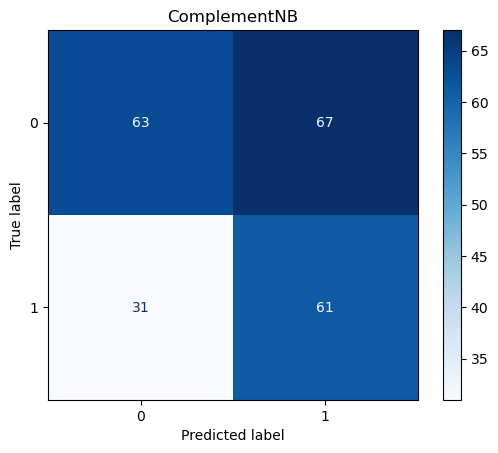

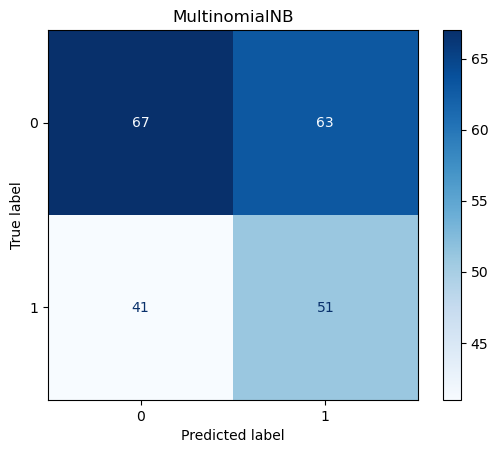

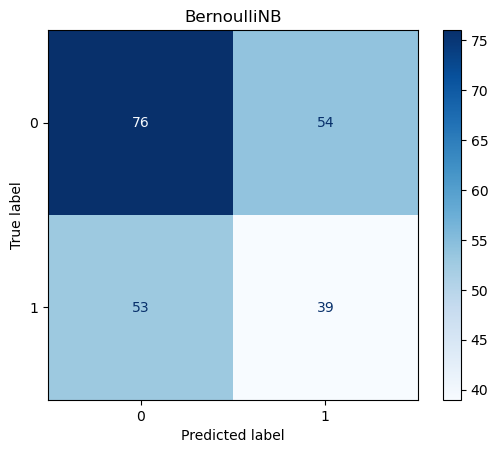

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
classifiers = [CNB, MNB, BNB]
for clf in classifiers:
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(str(clf.__class__.__name__))
    plt.show()

0.5580685618729097 0.5580685618729097 0.5706521739130435


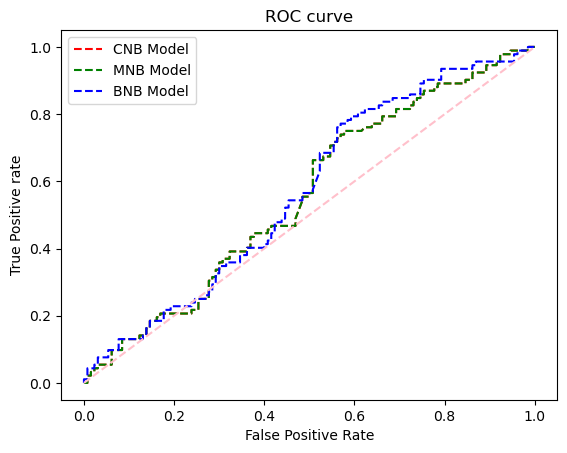

In [29]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(x_test)
MNB_prob = MNB.predict_proba(x_test)
BNB_prob = BNB.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# 4.6 Trying different n-grams:


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

### a) Bigram: ngram_range = (2,2)

In [31]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_twograms = CountVectorizer(stop_words='english',ngram_range = (2,2),tokenizer = token.tokenize)
text_counts_twograms = cv_twograms.fit_transform(nb['comments'])

x_train, x_test, y_train, y_test = train_test_split(text_counts_twograms, nb['predicted_sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 41.89%


### b) Trigram: ngram_range= (3,3)¶

In [32]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_threegrams = CountVectorizer(stop_words='english',ngram_range = (3,3),tokenizer = token.tokenize)
text_counts_threegrams = cv_threegrams.fit_transform(nb['comments'])

x_train, x_test, y_train, y_test = train_test_split(text_counts_threegrams, nb['predicted_sentiment'], test_size=0.20,random_state=30)

MNB = MultinomialNB()
MNB.fit(x_train, y_train)
predicted = MNB.predict(x_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')

model accuracy is 40.54%


# 4.7 TF-IDF: Term Frequency-Inverse Document Frequency

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(nb['comments'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(text_count_2, nb['predicted_sentiment'],test_size=0.20,random_state=30)

In [35]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 59.46%


In [36]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 60.81%


In [37]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 51.35%
